In [1]:
from rdkit import Chem 
import pubchempy as pcp

A partir da biblioteca pubchempy, é possível pesquisar smiles canônicos de compostos apenas usando seus nomes. A função get_compounds recebe o nome do composto e o que deve ser buscado dele(nesse caso, o nome). Como a função retorna uma lista de 1 item, é necessário pegar apenas o primeiro item[0]. Pra obter o nome, basta usar o "canonical_smile" para pegar esse atriboto da classe composto.

In [2]:

eteno = pcp.get_compounds("ethene","name")[0]
smile_eteno = eteno.canonical_smiles
#também podemos fazer isso:
ethene = pcp.get_compounds("ethene","name")[0].canonical_smiles

print(f'O eteno é o composto {eteno} e tem por SMILE {smile_eteno}')


O eteno é o composto Compound(6325) e tem por SMILE C=C


Com a função MolFromSmile da classe chem do rdkit, e possível fazer o plot dessa molécula

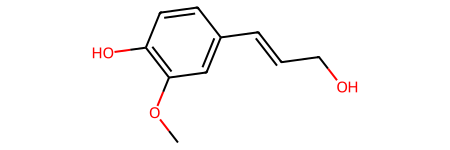

In [3]:
alcool_conifero = pcp.get_compounds("coniferyl alcohol","name")[0].canonical_smiles
imagem = Chem.MolFromSmiles(alcool_conifero)
imagem

In [4]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Descriptors
from rdkit.Chem import AllChem
from rdkit.Chem import DataStructs
import numpy as np


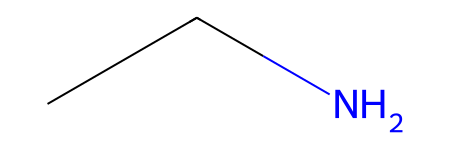

CCN


In [5]:
mol = Chem.MolFromSmiles("CCN")

smile = Chem.MolToSmiles(mol)

display(mol)
print(smile)

In [6]:
massa_molecular = Descriptors.MolWt(mol)

print(massa_molecular)

45.084999999999994


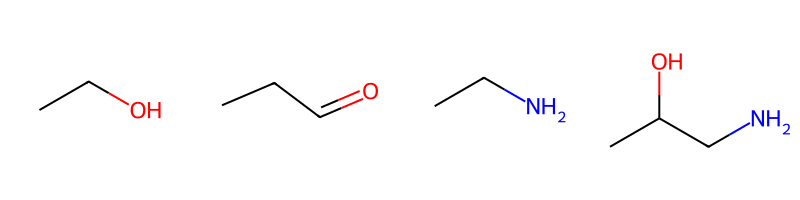

In [7]:
smiles = ["CCO","C(C=O)C","CCN","OC(CN)C"]

mols = []

for i in smiles:
    mol = Chem.MolFromSmiles(i)
    mols.append(mol)


Draw.MolsToGridImage(mols, molsPerRow= 4) # se o molsperrow nao for definido, será apenas 3

In [8]:
padrao = Chem.MolFromSmiles("N")

for i in mols:
    print(i.HasSubstructMatch(padrao))

False
False
True
True


In [9]:
fp=AllChem.GetMorganFingerprintAsBitVect(mol,4, nBits = 1024)
fp_arr = np.zeros((1,))
DataStructs.ConvertToNumpyArray(fp,fp_arr)
print(np.nonzero(fp_arr))

(array([  1,  33,  80, 116, 147, 227, 283, 807, 885, 913, 981], dtype=int64),)


In [10]:
mol.HasSubstructMatch(mol)

True

In [20]:
from rdkit import Chem
import pubchempy as pbp


def presenca_de_subsestrutura(substancias,padrao):
    subsestrutura = Chem.MolFromSmiles(padrao)
    mols = []
    for i in substancias:
        composto = pbp.get_compounds(i,"name")[0]
        smile = composto.canonical_smiles
        mol = Chem.MolFromSmiles(smile)
        if mol.HasSubstructMatch(subsestrutura) == True:
            print(f'O composto {i} tem a subsestrutura {subsestrutura}')
        else:
            print(f'O composto {i} não tem a subsestrutura {subsestrutura}')



In [21]:
presenca_de_subsestrutura(["COC","KCl"],"Cl")

O composto COC não tem a subsestrutura <rdkit.Chem.rdchem.Mol object at 0x0000023F357E9FC0>
O composto KCl tem a subsestrutura <rdkit.Chem.rdchem.Mol object at 0x0000023F357E9FC0>
